In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [4]:
import lib_subspaces as lsub

In [5]:
cd ~/HPT_500k/HPT_LS05_DOM30_TI5/Subspaces/

/mnt/drive2/re_500k/HPT_LS05_DOM30_TI5/Subspaces


In [7]:
blocks=range(1,5)

start_TS=5410601
stop_TS= 5510101
inc_TS=500
steps=range(start_TS,stop_TS,inc_TS)
tau_w=lsub.subspace('WALL_SH_HEAT',20,start_TS,blocks,source_folder='./')
tau_w.load_grid()
tau_w.load_data(steps,read_all=True)

The dataset requires 2287.916992 Mb of RAM


In [8]:
sim_ts=2.1*10**(-5)
dt=inc_TS*sim_ts
f_sub=1./dt
nsteps=len(steps,read_all=True)
print 'number of steps in Subspaces: %i'%nsteps

TypeError: len() takes no keyword arguments

In [8]:
id_min=np.argmin(tau_w.grid[0][0,0,:,0])
id_max=np.argmax(tau_w.grid[1][0,0,:,0])
arc_length=[]
k=0
order=[1,0,2,3]
start=[]
for ib in order:
    nxp,nyp,nzp = tau_w.header[0][ib]
    temp=np.empty(nyp)
    if k==0:
        temp[0]=0.
    else:
        temp[0]=arc_length[-1][-1]
    k+=1
    for i in range(1,nyp):
        temp[i]=temp[i-1]+np.sqrt((tau_w.grid[ib][0,0,i,0]-tau_w.grid[ib][0,0,i-1,0])**2
                                 +(tau_w.grid[ib][1,0,i,0]-tau_w.grid[ib][1,0,i-1,0])**2)
    arc_length.append(temp)

temp=arc_length[1][id_min]
    
for j in range(4):
    arc_length[j]-=temp

    
    
plt.figure()
for ib in range(4):
    plt.plot(tau_w.grid[ib][0,0,:,0],arc_length[order[ib]])

<IPython.core.display.Javascript object>

# Compute histogram

In [9]:
levs=np.logspace(0,2.4,num=9)
norml = matplotlib.colors.BoundaryNorm(levs, 256)

In [10]:
min_val=-.01
max_val=0.15
nps=0
starts=[]
for ib in range(4):
    nxp,nyp,nzp = tau_w.header[0][ib]    
    starts.append(nps)
    nps+=nyp-1
    
tau_w_hist=np.empty([50,nps])
off_i=0
for ib in range(4):
    ib_o=order[ib]
    nxp,nyp,nzp = tau_w.header[0][ib_o]    
    for j in range(1,nyp):
        a=np.histogram(-tau_w.data[ib_o][0,:,0,j,:],range=(min_val,max_val),bins=50,density=True)
        tau_w_hist[:,j+off_i-1]=a[0]
    off_i+=nyp-1  
bins=a[1]



/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:812: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bins


In [11]:
fact_qn=((1.+0.3686)/(1.35+0.3686))*(1.35**(1.5))/(1.81-1.35)
levs_heat=np.logspace(-5,-2,num=11)
norml_heat = matplotlib.colors.BoundaryNorm(levs_heat, 256)
max_val_heat=2000.
min_val_heat=-100.
heat_flux_hist=np.empty([200,nps])
off_i=0
for ib in range(4):
    ib_o=order[ib]
    nxp,nyp,nzp = tau_w.header[0][ib_o]    
    for j in range(1,nyp):
        a=np.histogram(tau_w.data[ib_o][1,:,0,j,:]*fact_qn,range=(min_val_heat,max_val_heat),bins=200,density=True)
        heat_flux_hist[:,j+off_i-1]=a[0]
    off_i+=nyp-1  
bins_heat=a[1]

In [12]:
intv=bins[:-1]+(max_val+min_val)/100.
intv_heat=bins_heat[:-1]+(max_val_heat+min_val_heat)/100.
l=np.concatenate([arc_length[0][1:],arc_length[1][1:],arc_length[2][1:],arc_length[3][1:]])
X,Y=np.meshgrid(l,intv)
X_heat,Y_heat=np.meshgrid(l,intv_heat)

In [13]:
plt.figure(figsize=(6,4))
plt.contourf(X,Y,tau_w_hist,levels=levs,norm=norml,extend='min')
plt.colorbar()
plt.xlabel('$s$')
plt.ylabel('hist$\left(\\tau_w\\right)$')
plt.tight_layout()
plt.savefig('../hist_tau_TI06_LS05.pdf')
plt.grid()

<IPython.core.display.Javascript object>

In [14]:
plt.figure(figsize=(6,4))
plt.contourf(X_heat,Y_heat,heat_flux_hist,levels=levs_heat,norm=norml_heat,extend='min')
plt.colorbar()
plt.xlabel('$s$')
plt.ylabel('hist$\left(q_{n}\\right)$')
plt.tight_layout()
plt.grid()
plt.savefig('../hist_heat_TI06_LS05.pdf')


<IPython.core.display.Javascript object>

In [15]:
plt.figure()
for j in range(600,900,50):
    plt.plot(Y_heat[:,j],heat_flux_hist[:,j],label='x=%6.3f'%X_heat[0,j])
plt.legend()

<IPython.core.display.Javascript object>

# Skin friction and heatflux at wall

In [62]:
spa_grid=[]
for ib in range(4):
    spa_grid.append(np.meshgrid(arc_length[ib],tau_w.grid[ib][2,0,0,:]))
levs=np.linspace(0.,1500.,num=16)
levs_lines=np.linspace(0.,1500.,num=6)
levs_tau=np.linspace(-0.05,0.1,num=21)

<IPython.core.display.Javascript object>


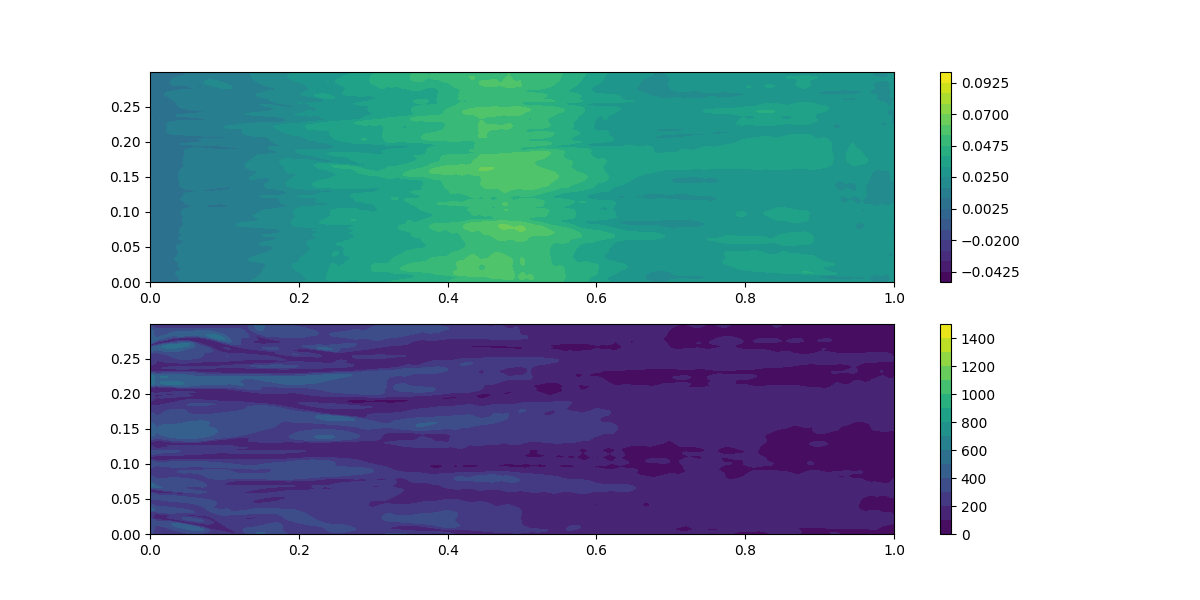

<IPython.core.display.Javascript object>


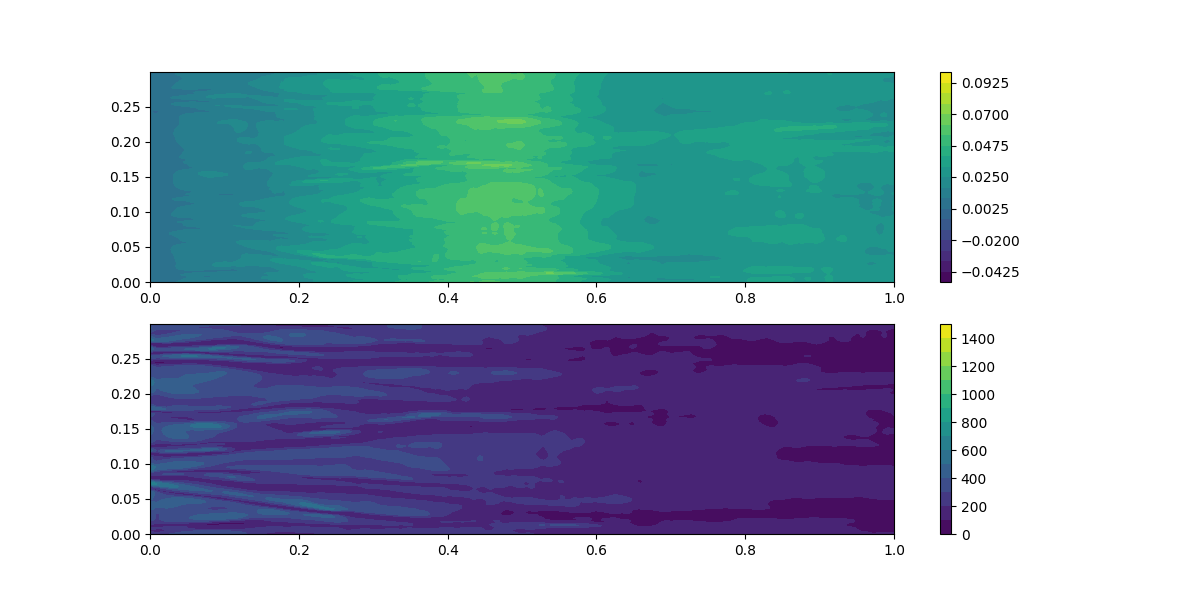

In [63]:
for j in range(0,nsteps,100):
    plt.figure(figsize=(12,6))
    plt.subplot(2,1,1)
    for ib in range(4):
        cb1=plt.contourf(spa_grid[ib][0],spa_grid[ib][1],-tau_w.data[order[ib]][0,j,0,:,:].transpose(),levels=levs_tau)
    plt.colorbar(cb1)
    plt.xlim([0.,1.])
    plt.subplot(2,1,2)
    for ib in range(4):
        cb1=plt.contourf(spa_grid[ib][0],spa_grid[ib][1],tau_w.data[order[ib]][1,j,0,:,:].transpose(),levels=levs)
    plt.colorbar(cb1)
    plt.xlim([0.,1.])  
    

<IPython.core.display.Javascript object>


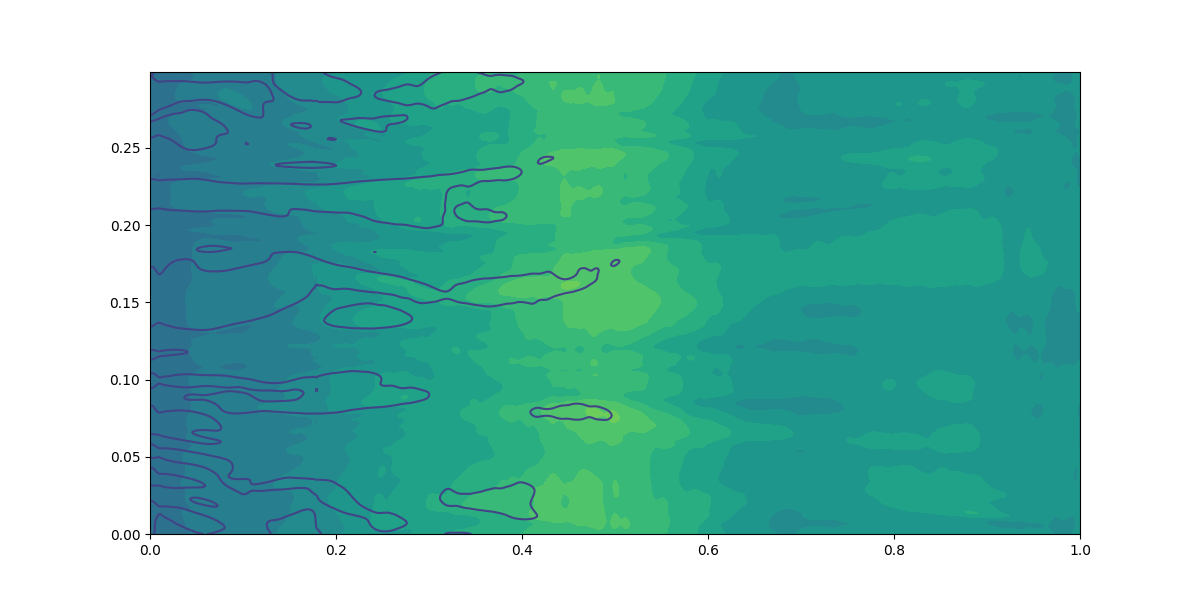

<IPython.core.display.Javascript object>


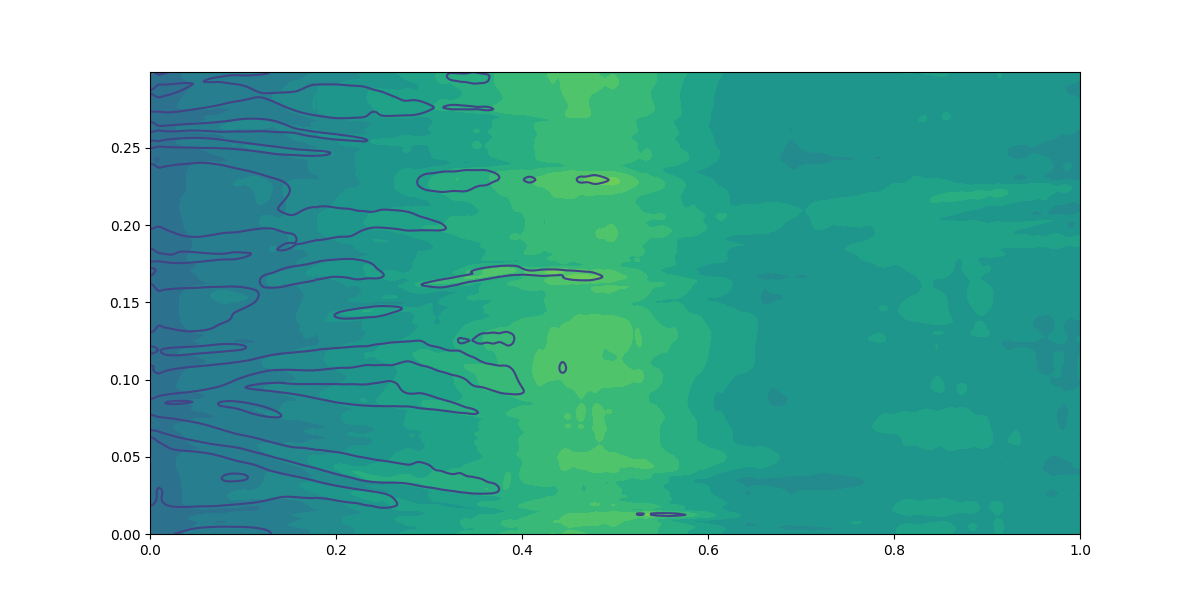

In [64]:
for j in range(0,nsteps,100):
    plt.figure(figsize=(12,6))
    for ib in range(4):
        cb1=plt.contourf(spa_grid[ib][0],spa_grid[ib][1],-tau_w.data[order[ib]][0,j,0,:,:].transpose(),levels=levs_tau)
        plt.contour(spa_grid[ib][0],spa_grid[ib][1],tau_w.data[order[ib]][1,j,0,:,:].transpose(),levels=levs_lines,linecolors='k')
    plt.xlim(0.,1.)

# Space time plot

In [16]:
dt=500.*2.*10**(-5)
n_t=nsteps
time_ax=np.linspace(0,n_t*dt,num=nsteps)
X_T,T=np.meshgrid(tau_w.grid[ib][2,0,0,:],time_ax)

In [17]:
levs=np.linspace(0.,2000.,num=21)
levs_tau=np.linspace(-0.05,0.1,num=21)
k=-1
for ib in [0,2,3]:
    k+=1
    for j in range(0,len(tau_w.grid[ib][0,0,:,0]),50):
        fig=plt.figure(figsize=(8,4))
        plt.subplot(1,2,1)
        cb= plt.contourf(X_T,T,tau_w.data[ib][1,:,0,j,:],levels=levs,extend='min')
        plt.title('%7.3f'%arc_length[k][j])
        plt.xlabel('span')
        plt.ylabel('time')
        plt.colorbar(label=r'$q_n$')
        plt.subplot(1,2,2)
        cb= plt.contourf(X_T,T,-tau_w.data[ib][0,:,0,j,:],levels=levs_tau,extend='min')
        plt.title('%7.3f'%arc_length[k][j])
        plt.xlabel('span')
        #plt.ylabel('time')
        plt.colorbar(label=r'$\tau_w$')
        plt.contour(X_T,T,-tau_w.data[ib][0,:,0,j,:],levels=[0.],colors=['k'],linestyle='--')     
        plt.tight_layout()
        plt.savefig('../post/q_n_tau_w_ib%i_pos%i.png'%(ib,j),dpi=600)        

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

IndexError: index 250 is out of bounds for axis 0 with size 224

<IPython.core.display.Javascript object>


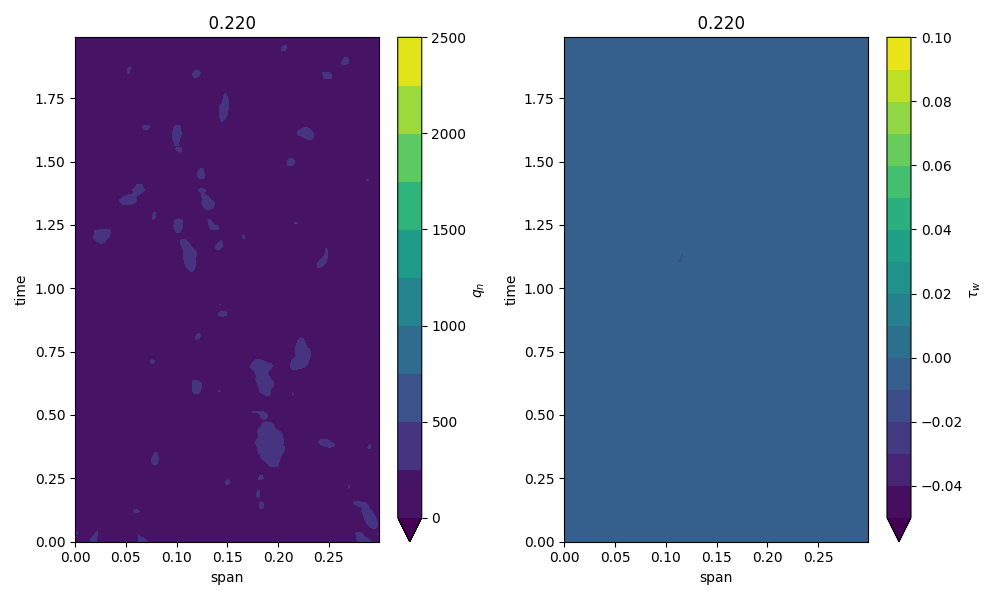

<IPython.core.display.Javascript object>


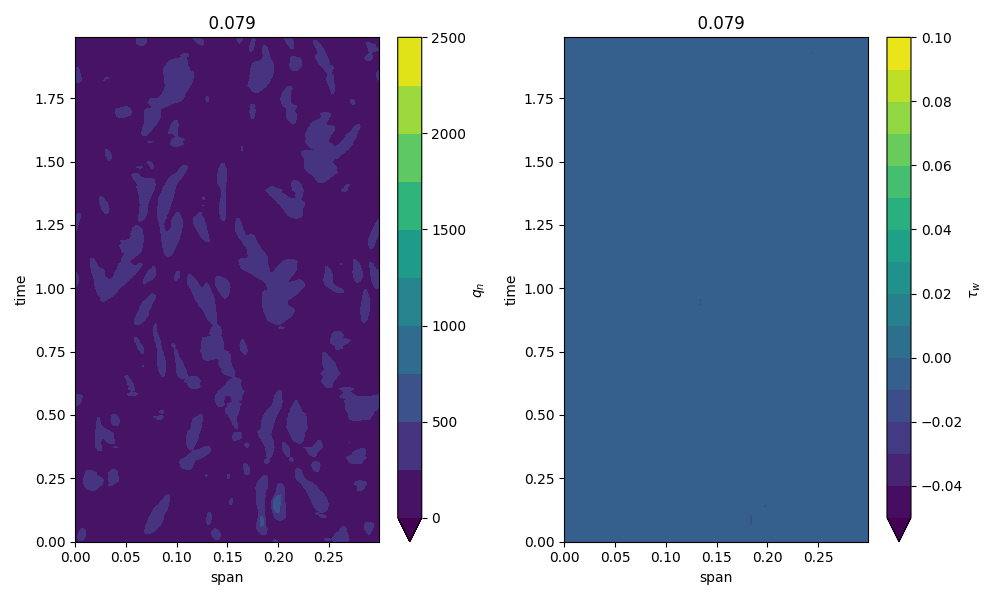

<IPython.core.display.Javascript object>


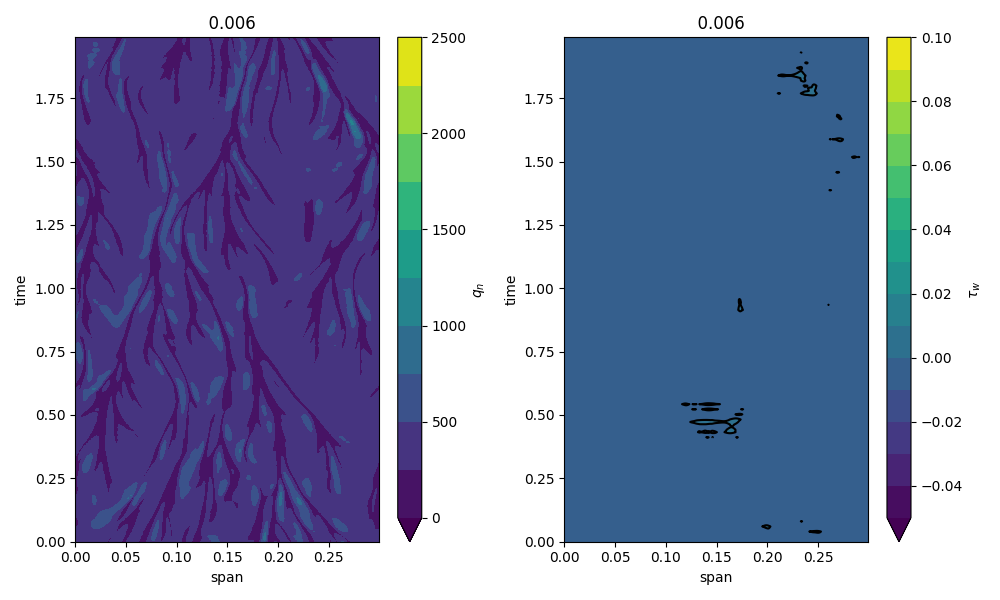

<IPython.core.display.Javascript object>


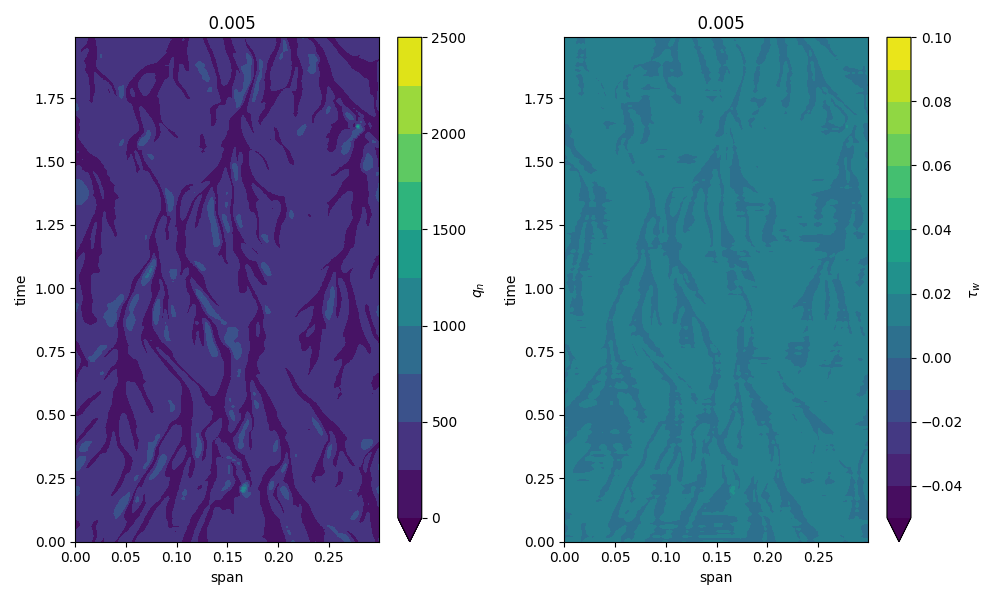

<IPython.core.display.Javascript object>


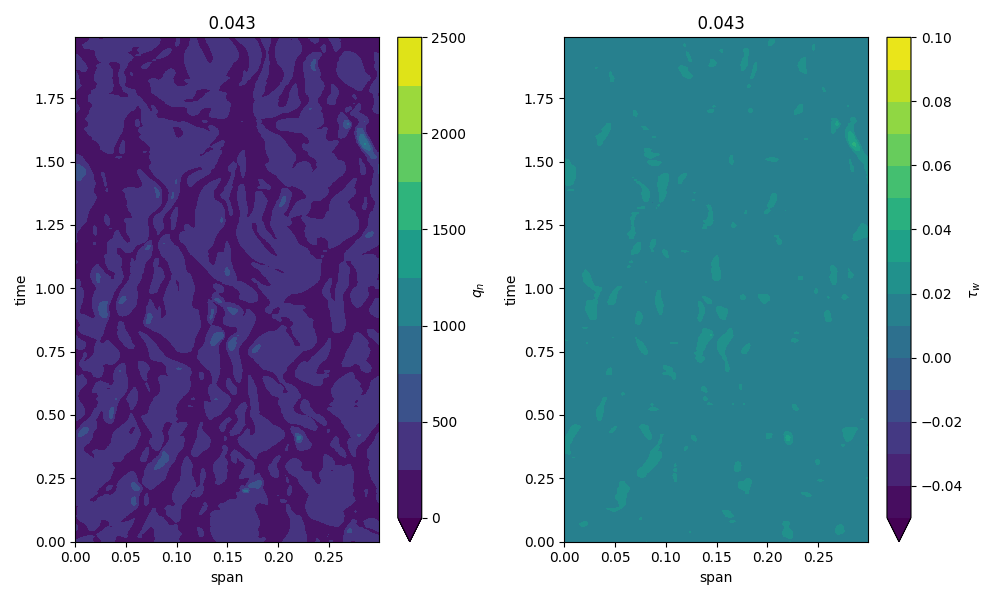

/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


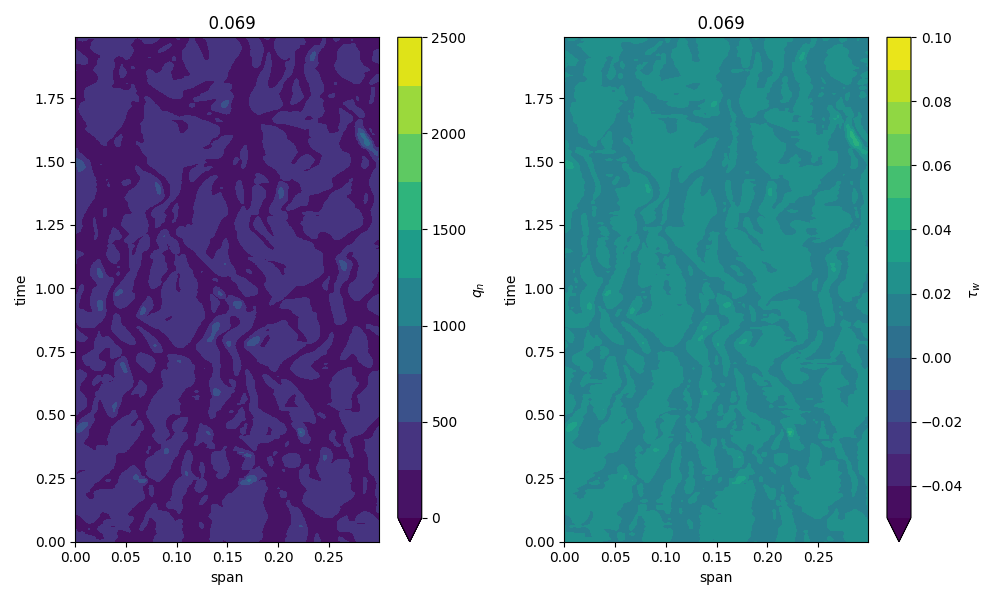

<IPython.core.display.Javascript object>


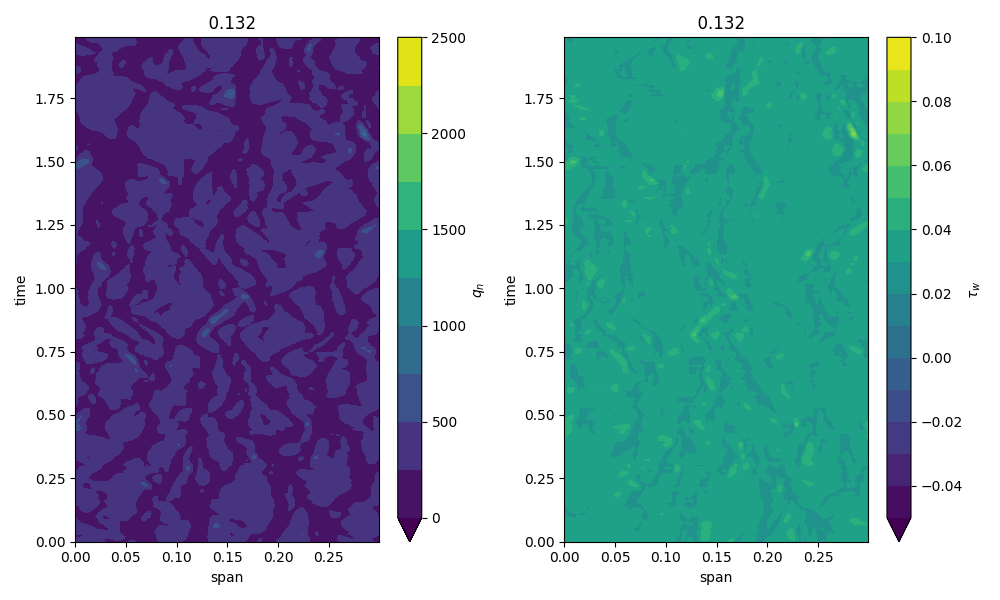

<IPython.core.display.Javascript object>


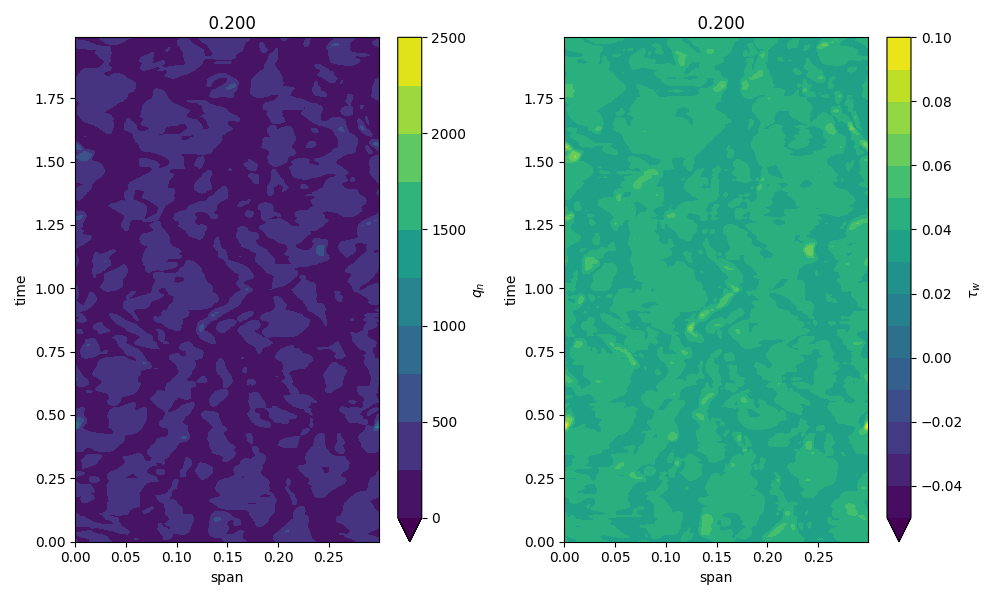

<IPython.core.display.Javascript object>


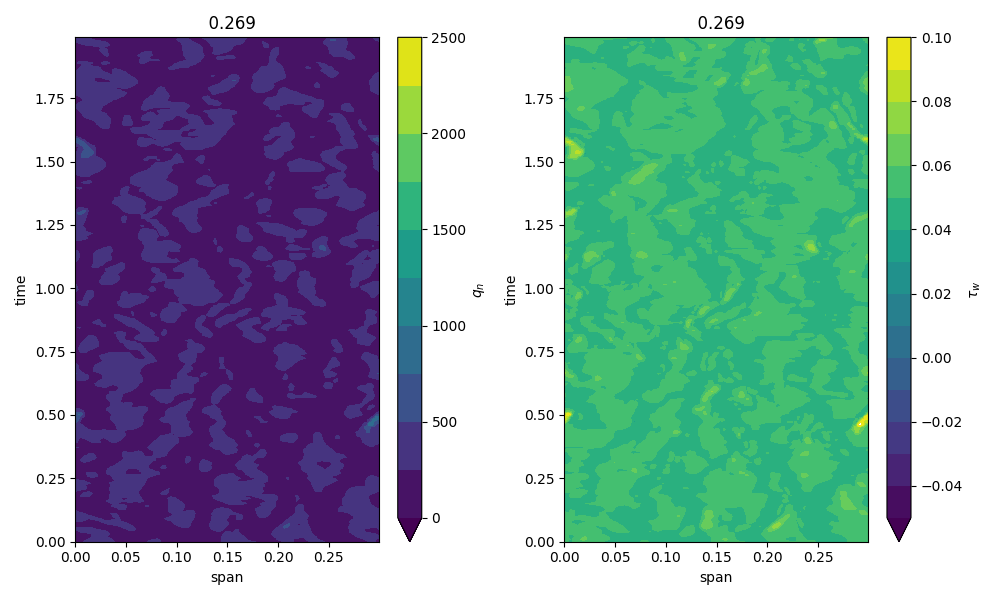

<IPython.core.display.Javascript object>


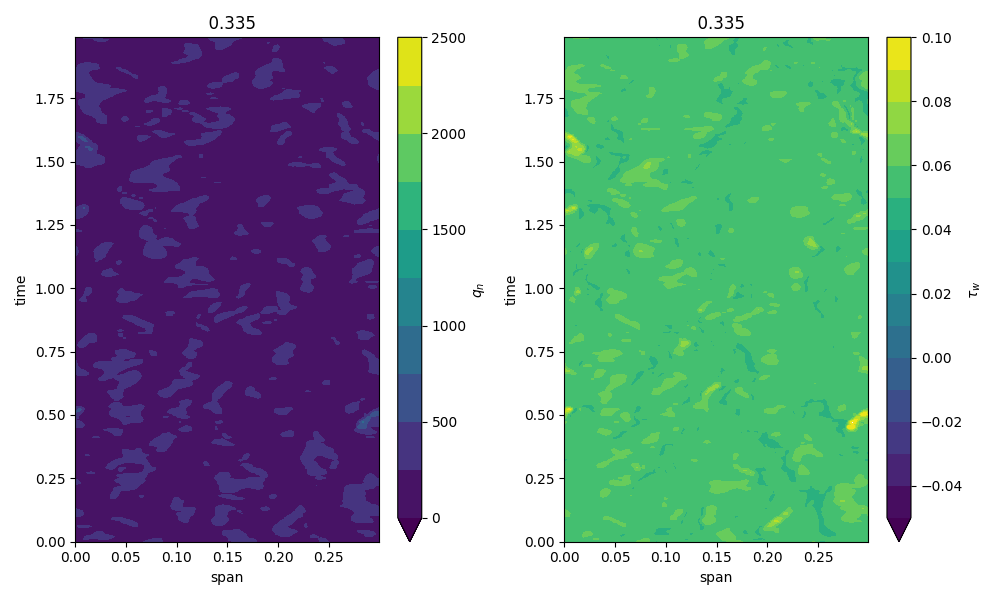

<IPython.core.display.Javascript object>


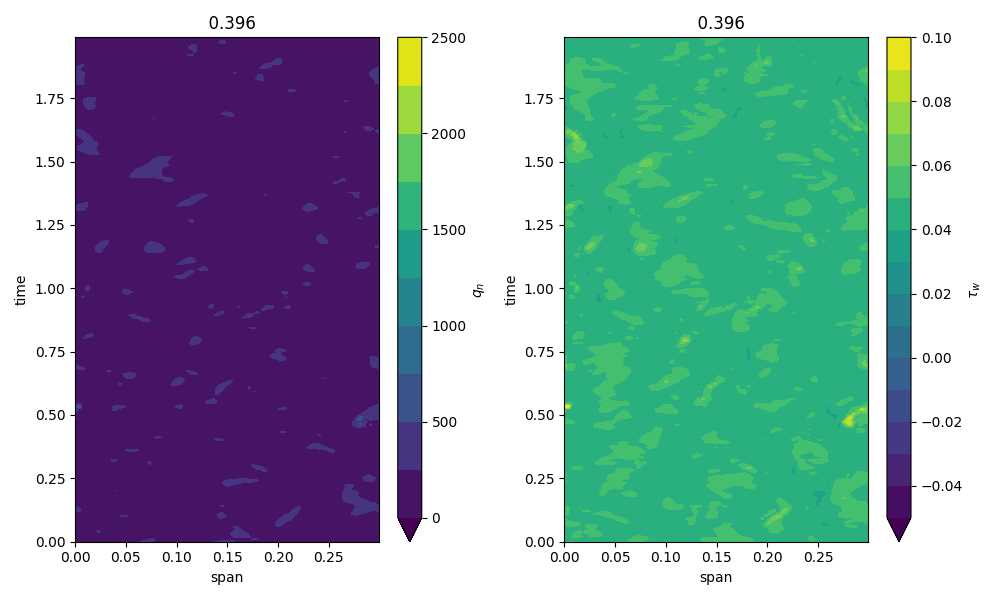

<IPython.core.display.Javascript object>


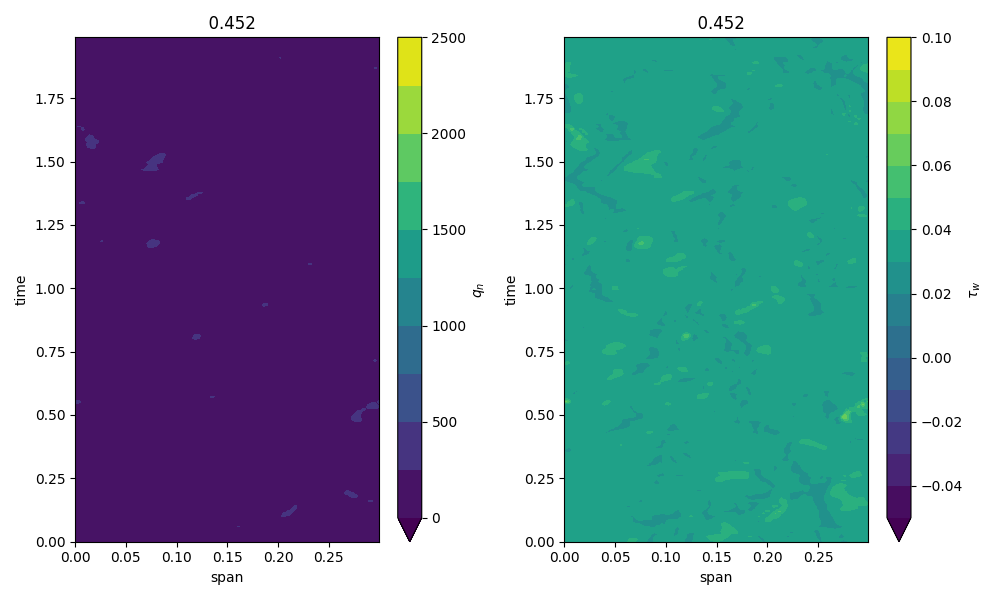

<IPython.core.display.Javascript object>


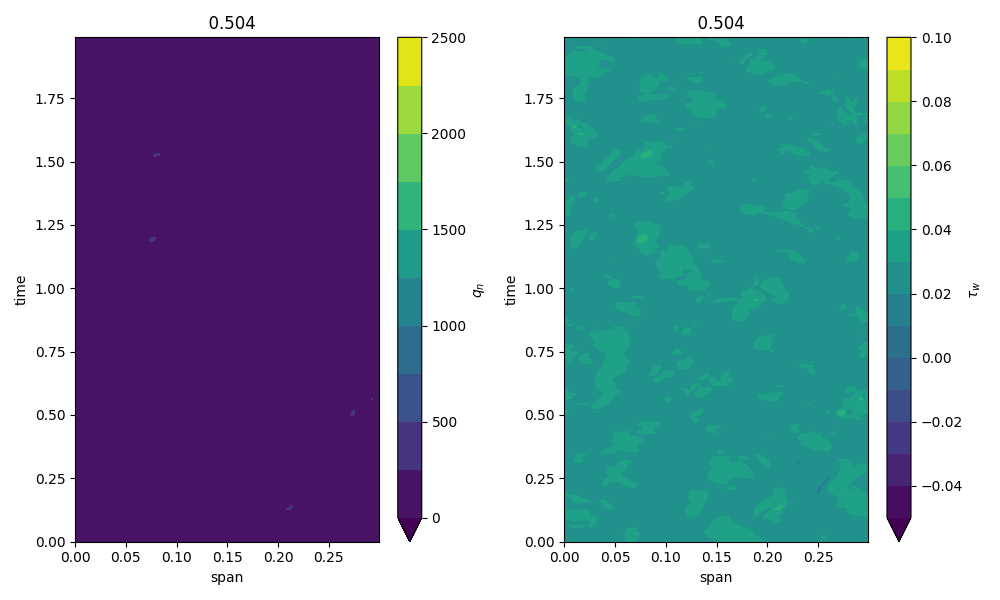

<IPython.core.display.Javascript object>


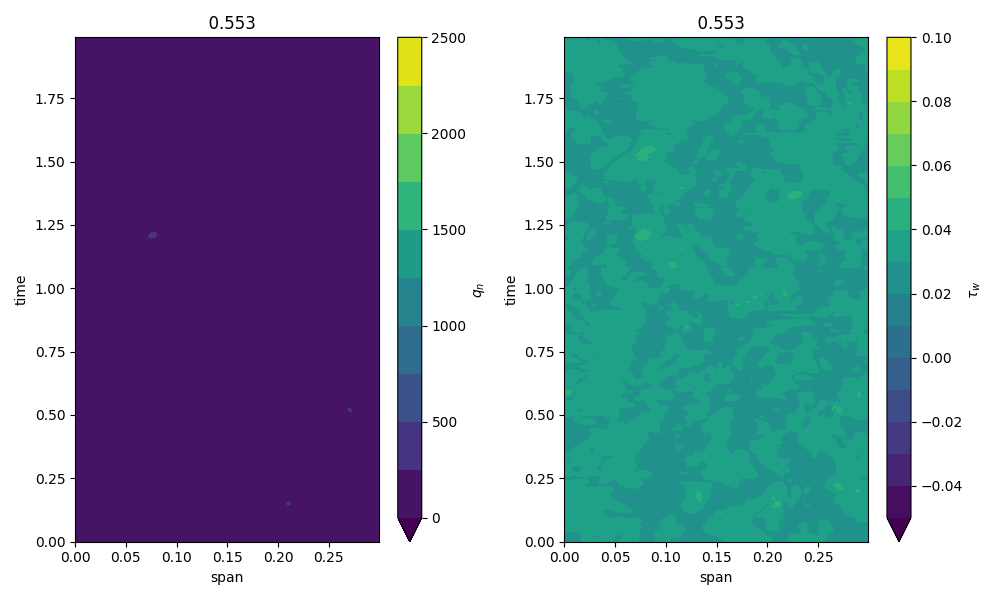

<IPython.core.display.Javascript object>


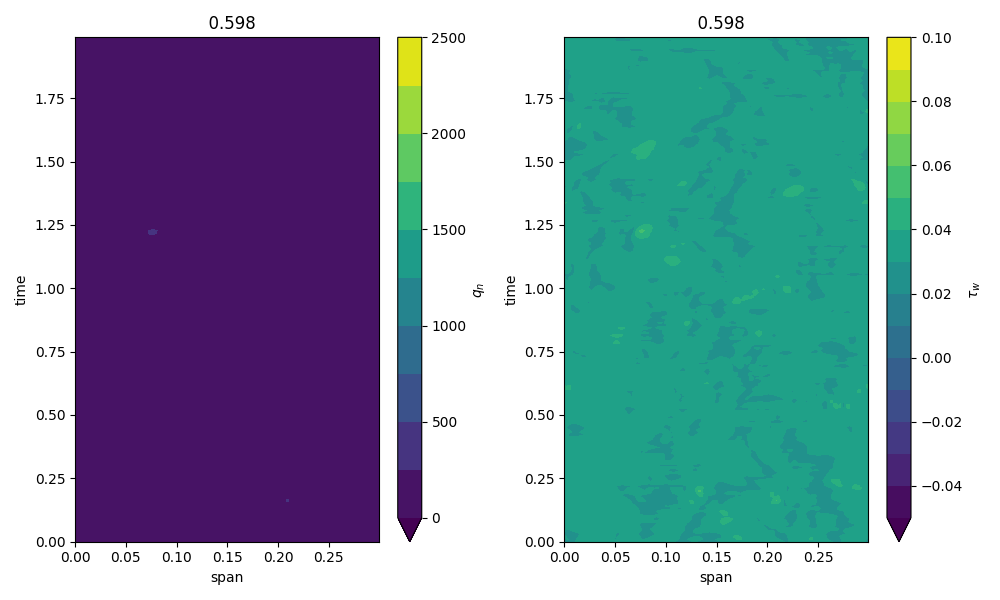

<IPython.core.display.Javascript object>


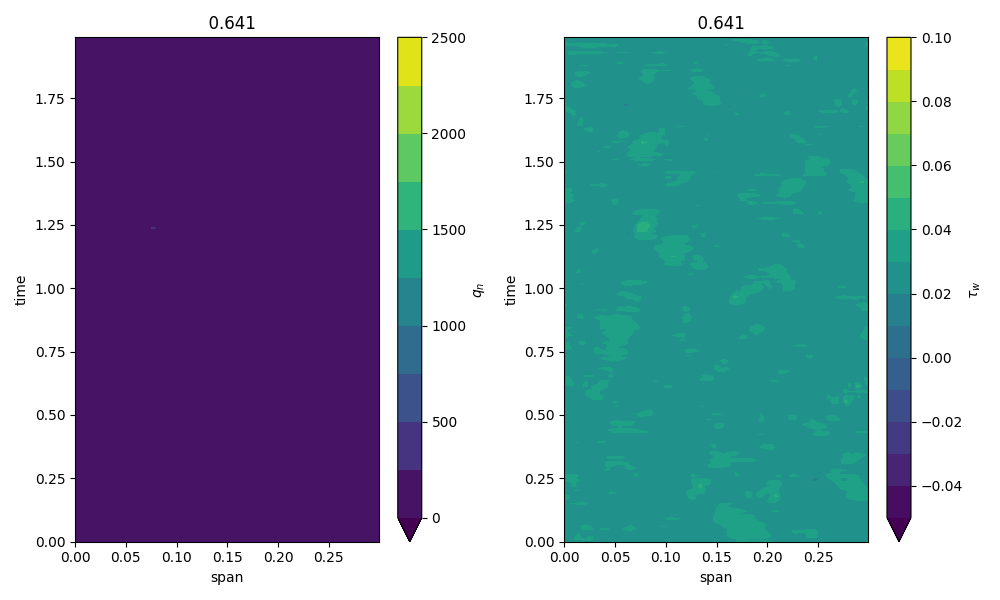

<IPython.core.display.Javascript object>


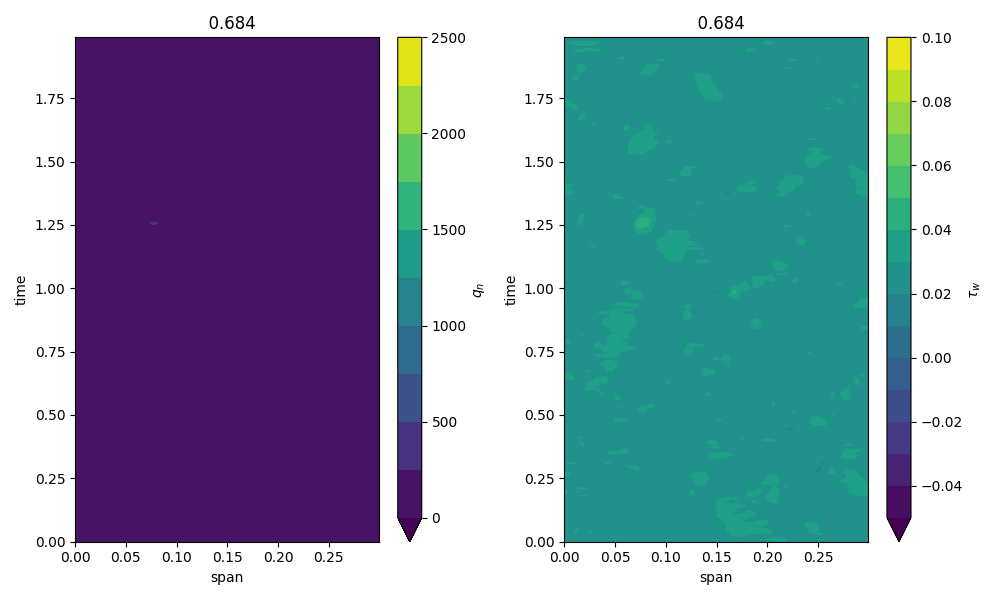

<IPython.core.display.Javascript object>


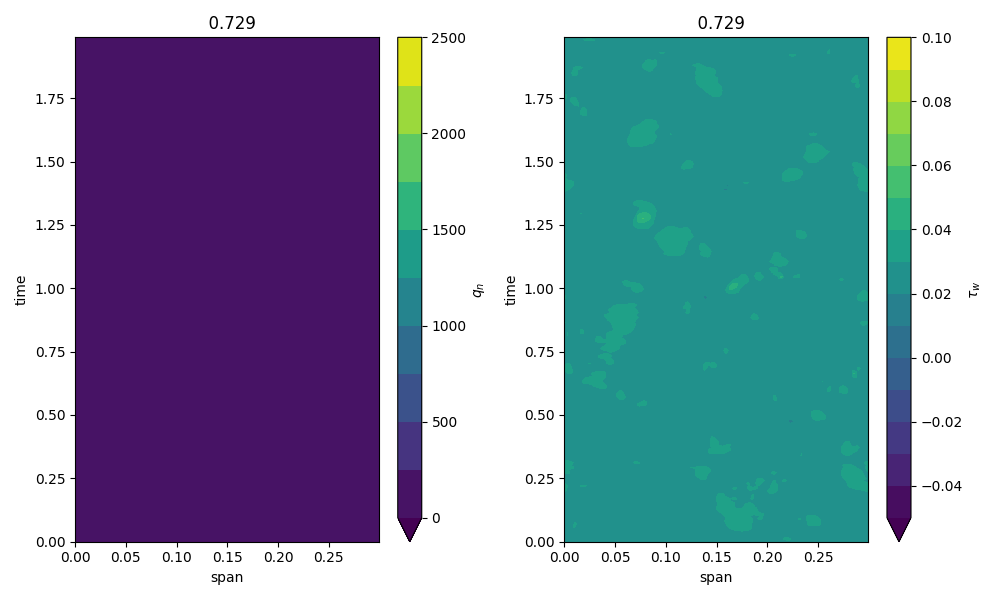

<IPython.core.display.Javascript object>


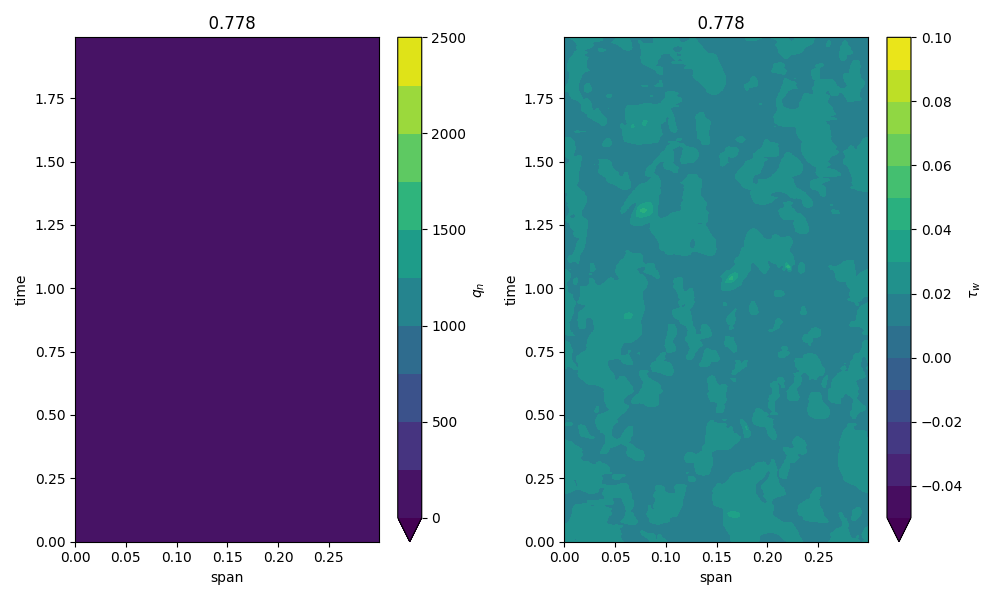

<IPython.core.display.Javascript object>


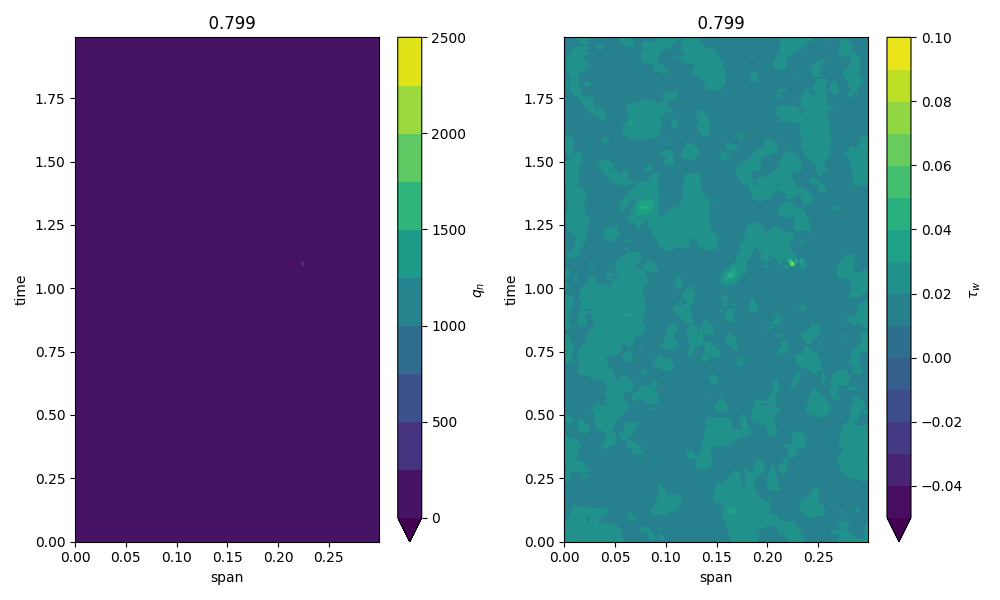

<IPython.core.display.Javascript object>


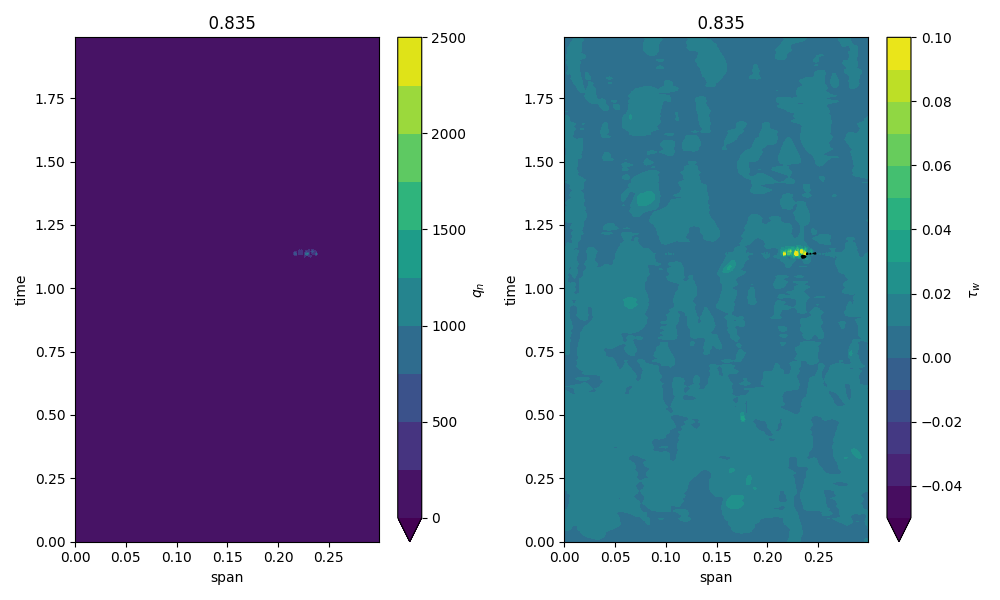

<IPython.core.display.Javascript object>


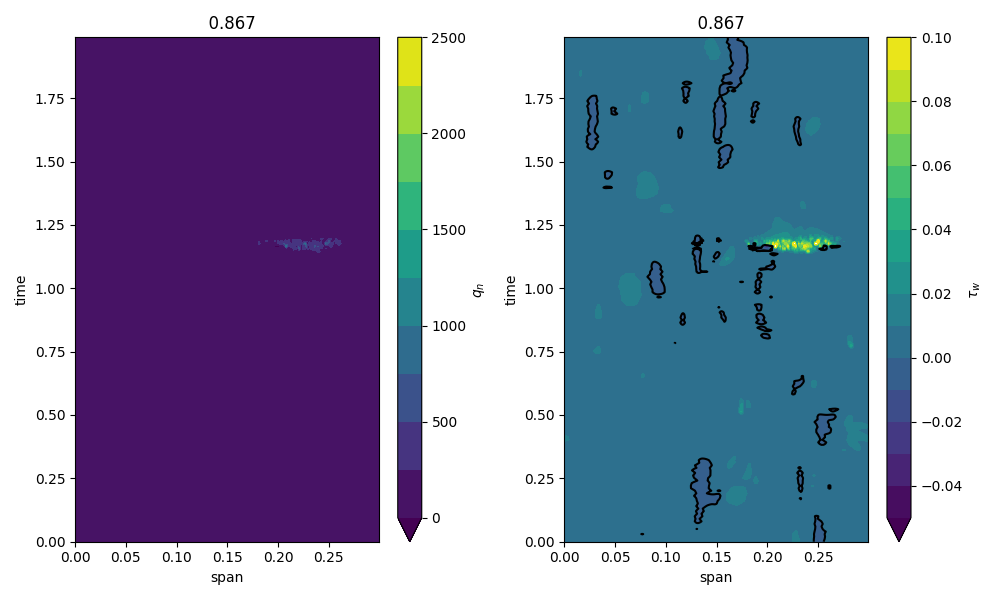

<IPython.core.display.Javascript object>


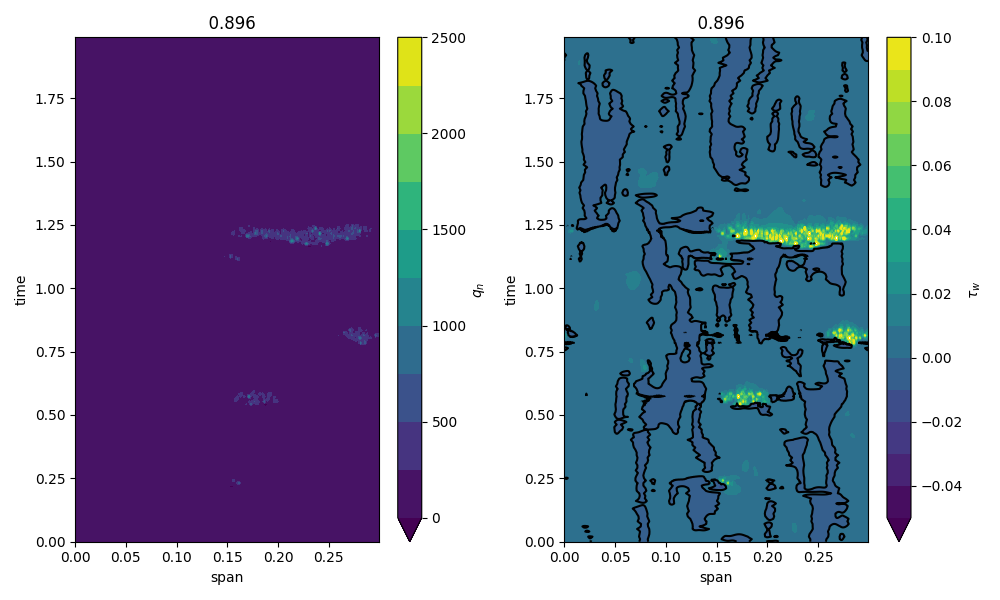

<IPython.core.display.Javascript object>


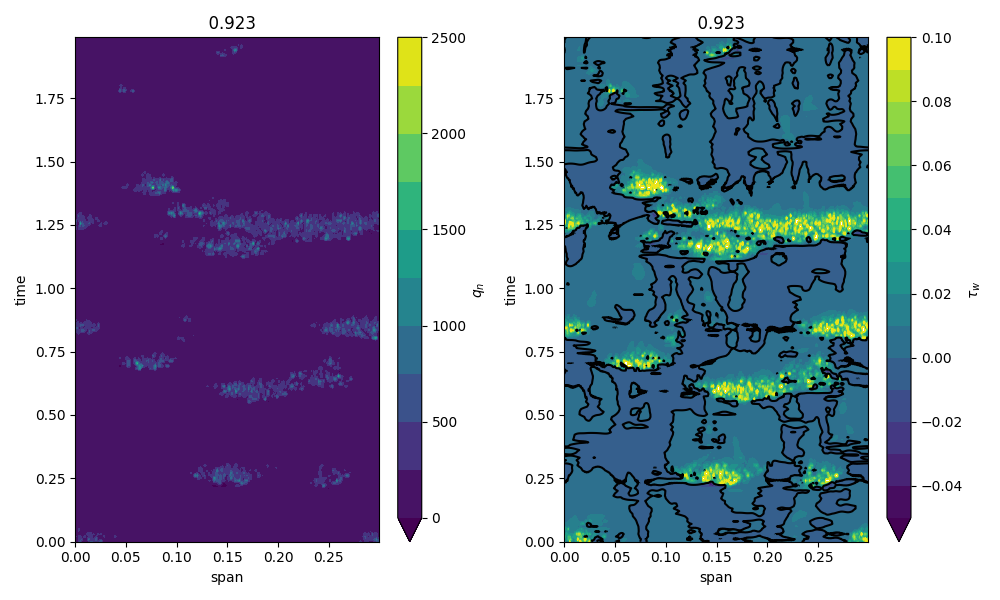

<IPython.core.display.Javascript object>


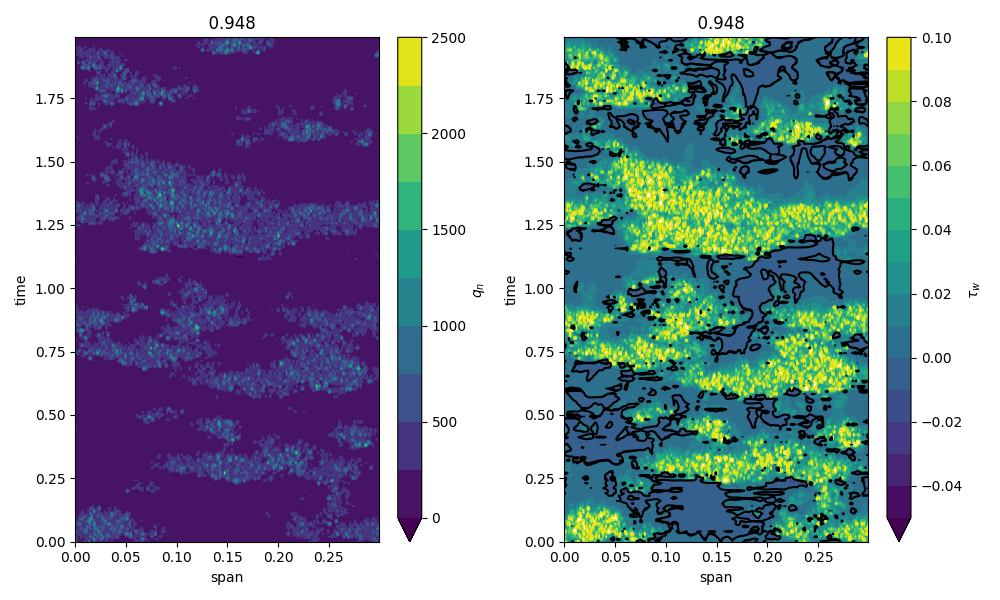

<IPython.core.display.Javascript object>


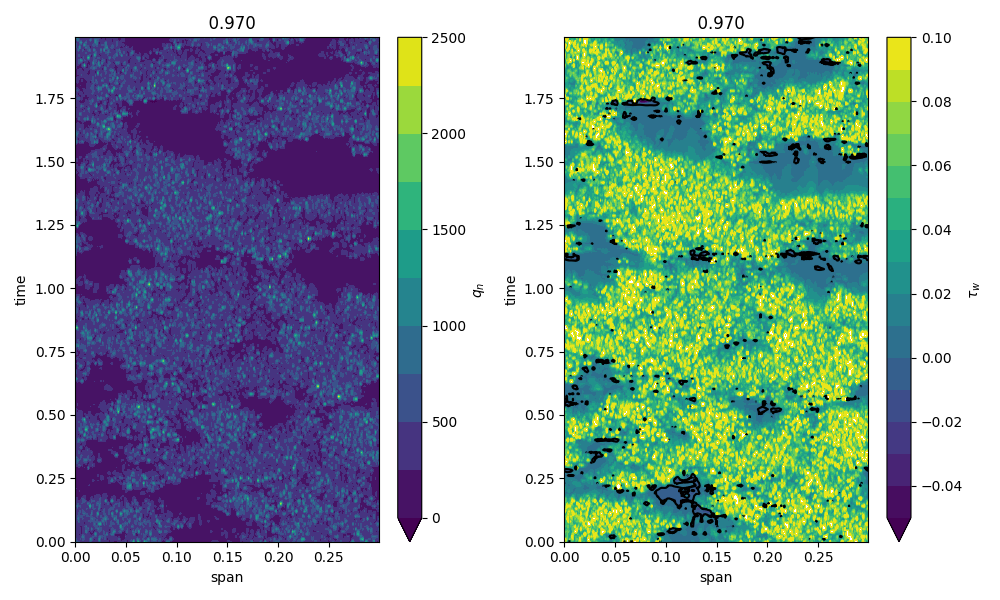

<IPython.core.display.Javascript object>


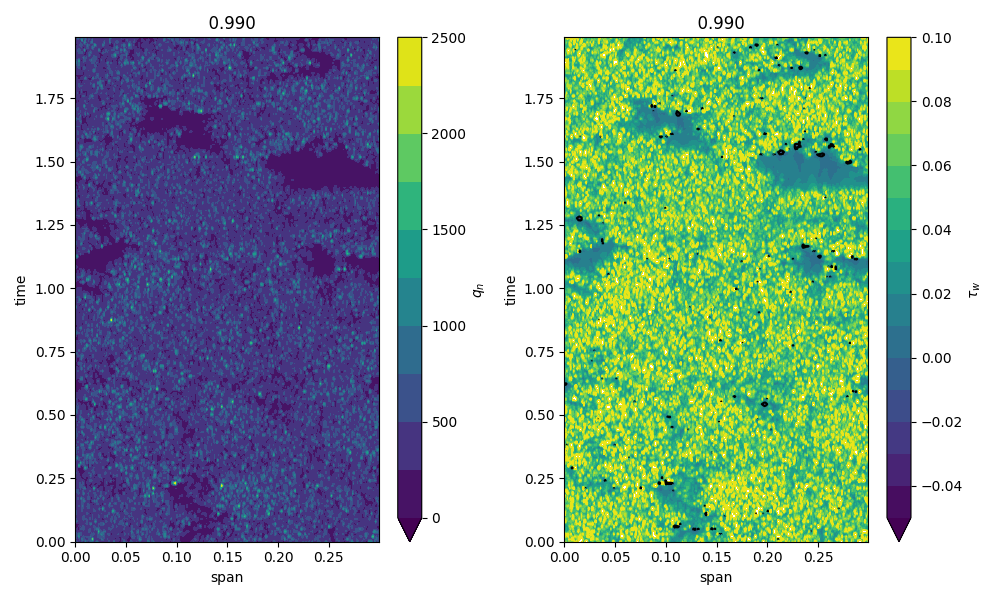

In [18]:

levs=np.linspace(0.,2500.,num=11)
levs_tau=np.linspace(-0.05,0.1,num=16)
for ib in [0,2,3]:
    X_T,T=np.meshgrid(tau_w.grid[ib][2,0,0,:],time_ax)
    for j in range(0,len(tau_w.grid[ib][0,0,:,0]),50):
        fig=plt.figure(figsize=(10,6))
        plt.subplot(1,2,1)
        cb= plt.contourf(X_T,T,tau_w.data[ib][1,:,0,j,:],levels=levs,extend='min')
        plt.title('%7.3f'%tau_w.grid[ib][0,0,j,0])
        plt.xlabel('span')
        plt.ylabel('time')
        plt.colorbar(label=r'$q_n$')
        plt.subplot(1,2,2)
        cb= plt.contourf(X_T,T,-tau_w.data[ib][0,:,0,j,:],levels=levs_tau,extend='min')
        plt.title('%7.3f'%tau_w.grid[ib][0,0,j,0])
        plt.xlabel('span')
        plt.ylabel('time')
        plt.colorbar(label=r'$\tau_w$')
        plt.contour(X_T,T,-tau_w.data[ib][0,:,0,j,:],levels=[0.],colors=['k'],linestyle='--')     
        plt.tight_layout()
        plt.savefig('../post/surf_length_time_q_n_tau_w_ib%i_pos%i.png'%(ib,j),dpi=600)

# Spectra

## temporal spectra

In [21]:
import spectral_functions as sf

In [22]:
max_val=0.15
nfft=nsteps
nz=10
tau_w_psd=np.zeros([nfft/2+1,nps])
off_i=0
for ib in range(4):
    ib_o=order[ib]
    nxp,nyp,nzp = tau_w.header[0][ib_o]        
    for j in range(1,nyp):
        a=np.zeros(nfft/2+1)
        for nz in range(0,nzp,4):
            a+=sf.spectral_func(-tau_w.data[2][0,:,0,j,nz],-tau_w.data[2][0,:,0,j,nz],Fs=f_sub,NFFT=nfft,scale='spectrum')
        tau_w_psd[:,off_i+j-1]=a
    off_i+=nyp-1
#frq=sf.get_freqs(-tau_w.data[2][0,:,0,j,0],NFFT=nfft,Fs=f_sub)

In [23]:
frq=sf.get_freqs(-tau_w.data[2][0,:,0,j,0],NFFT=nfft,Fs=f_sub)
Xs,Ys=np.meshgrid(l,frq)
print frq

[  0.           0.47858339   0.95716679   1.43575018   1.91433357
   2.39291697   2.87150036   3.35008375   3.82866715   4.30725054
   4.78583393   5.26441732   5.74300072   6.22158411   6.7001675
   7.1787509    7.65733429   8.13591768   8.61450108   9.09308447
   9.57166786  10.05025126  10.52883465  11.00741804  11.48600144
  11.96458483  12.44316822  12.92175162  13.40033501  13.8789184
  14.35750179  14.83608519  15.31466858  15.79325197  16.27183537
  16.75041876  17.22900215  17.70758555  18.18616894  18.66475233
  19.14333573  19.62191912  20.10050251  20.57908591  21.0576693
  21.53625269  22.01483609  22.49341948  22.97200287  23.45058626
  23.92916966  24.40775305  24.88633644  25.36491984  25.84350323
  26.32208662  26.80067002  27.27925341  27.7578368   28.2364202
  28.71500359  29.19358698  29.67217038  30.15075377  30.62933716
  31.10792056  31.58650395  32.06508734  32.54367073  33.02225413
  33.50083752  33.97942091  34.45800431  34.9365877   35.41517109
  35.89375449 

In [24]:
levs=np.logspace(-8,-3,num=11)
norml = matplotlib.colors.BoundaryNorm(levs, 256)

<IPython.core.display.Javascript object>


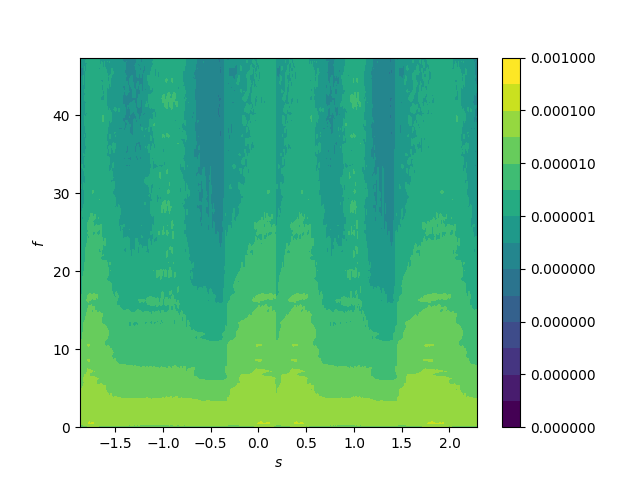

In [72]:
plt.figure()
plt.contourf(Xs,Ys,tau_w_psd,levels=levs,norm=norml)
plt.colorbar()
plt.xlabel('$s$')
plt.ylabel('$f$')
plt.savefig('temp_psd_tau_w.pdf')

<IPython.core.display.Javascript object>


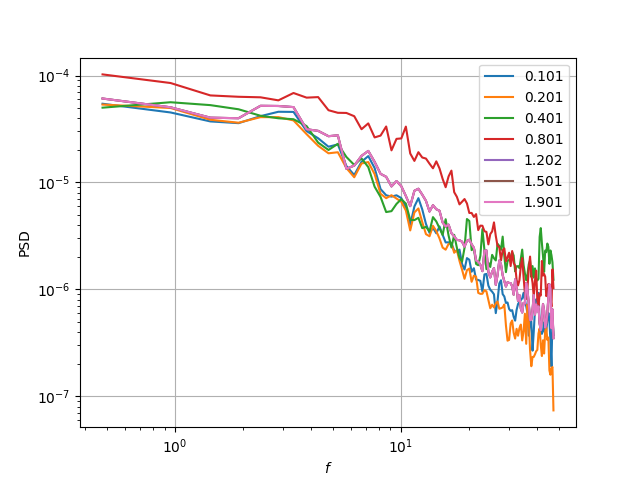

0
1
2
3
4
5
6


In [73]:
s_plot=[0.1,0.2,0.4,0.8,1.2,1.5,1.9]
plt.figure()
k=0
for j in range(nps):           
    if (l[j]>s_plot[k]):
        print k
        for i in range(4):
            if (j<starts[3-i]):
                i_j=j-starts[3-i]
        plt.loglog(frq,tau_w_psd[:,i_j],label='%5.3f'%l[j])
        k+=1
        if (k>len(s_plot)-1):
            break
plt.legend()
plt.grid()
plt.xlabel('$f$')
plt.ylabel('PSD')
plt.savefig('temp_psd_loc_tau_w.pdf')

## spanwise spectra

In [67]:
max_val=0.15
nxp,nyp,nzp = tau_w.header[0][0]        
nfft=nzp
del_z=tau_w.grid[0][2,0,0,1]-tau_w.grid[0][2,0,0,0]
tau_w_psd_span=np.zeros([nfft/2+1,nps])
off_i=0
for ib in range(4):
    ib_o=order[ib]
    nxp,nyp,nzp = tau_w.header[0][ib_o]        
    for j in range(1,nyp):
        a=np.zeros(nfft/2+1)
        for tj in range(0,nsteps):
            a+=sf.spectral_func(-tau_w.data[2][0,tj,0,j,:],-tau_w.data[2][0,tj,0,j,:],Fs=del_z,NFFT=nfft,scale='density')
        tau_w_psd_span[:,off_i+j-1]=a
    off_i+=nyp-1
#frq=sf.get_freqs(-tau_w.data[2][0,:,0,j,0],NFFT=nfft,Fs=f_sub)

In [68]:
waven_span=sf.get_freqs(-tau_w.data[2][0,:,0,j,0],NFFT=nfft,Fs=del_z)
Xs_waven,Y_waven=np.meshgrid(l,waven_span)
print del_z

0.000777202076279


In [69]:
levs=np.logspace(-10,-3,num=15)
norml = matplotlib.colors.BoundaryNorm(levs, 256)

<IPython.core.display.Javascript object>


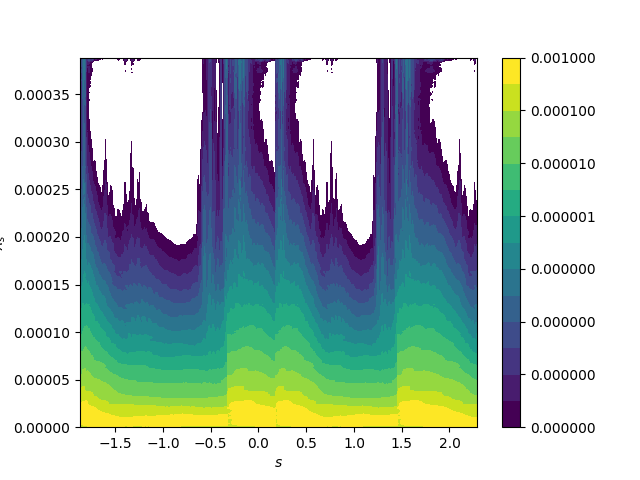

In [74]:
plt.figure()
plt.contourf(Xs_waven,Y_waven,tau_w_psd_span,levels=levs,norm=norml)
plt.colorbar()
plt.xlabel('$s$')
plt.ylabel('$\lambda_s$')
plt.savefig('span_spac_tau_w.pdf')

<IPython.core.display.Javascript object>


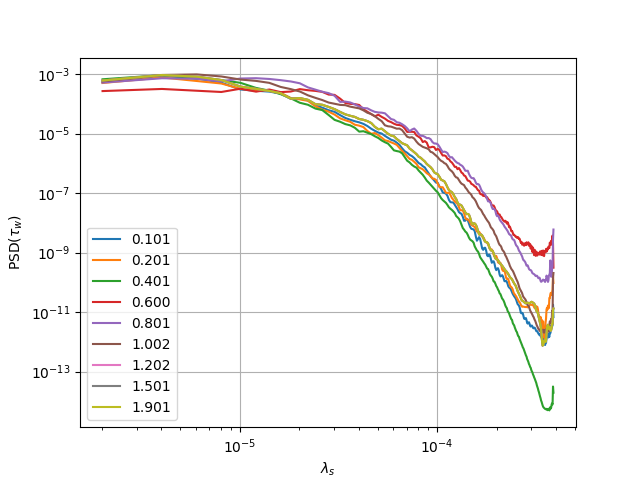

0
1
2
3
4
5
6
7
8


In [76]:
s_plot=[0.1,0.2,0.4,0.6,0.8,1.0,1.2,1.5,1.9]
plt.figure()
k=0
for j in range(nps):           
    if (l[j]>s_plot[k]):
        print k
        for i in range(4):
            if (j<starts[3-i]):
                i_j=j-starts[3-i]
        plt.loglog(waven_span,tau_w_psd_span[:,i_j],label='%5.3f'%l[j])
        k+=1
        if (k>len(s_plot)-1):
            break
plt.legend()
plt.grid()
plt.xlabel(r'$\lambda_s$')
plt.ylabel(r'PSD($\tau_w$)')
plt.savefig('span_spec_tau_w_loc.pdf')

# Cross correlation tau_w - q_n